In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

path = Path("plots/")
path.mkdir(exist_ok=True)

In [2]:
def forward_euler(A, N, T):
    dt = T/N
    x = np.zeros((N, 2))
    x[0]=[0.3, 0.1]
    for i in range(1,N):
        x[i] = x[i-1] + A @ x[i-1] * dt
    return x

In [3]:
def backward_euler(A, N, T):
    dt = T/N
    x = np.zeros((N, 2))
    x[0]=[0.3, 0.1]
    f = np.linalg.inv(np.identity(2) - A*dt)
    
    for i in range(1,N):
        x[i] = x[i-1] @ f
    return x

In [4]:
A = np.diag([1, -10e5])
Ns= [10, 1000, 1000000]

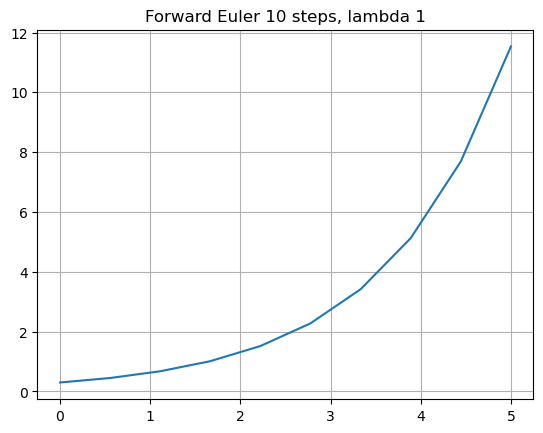

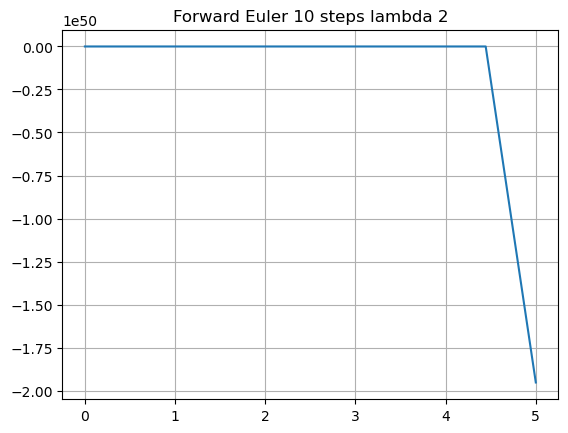

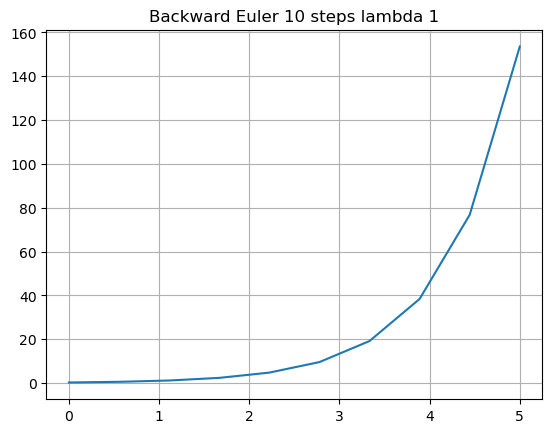

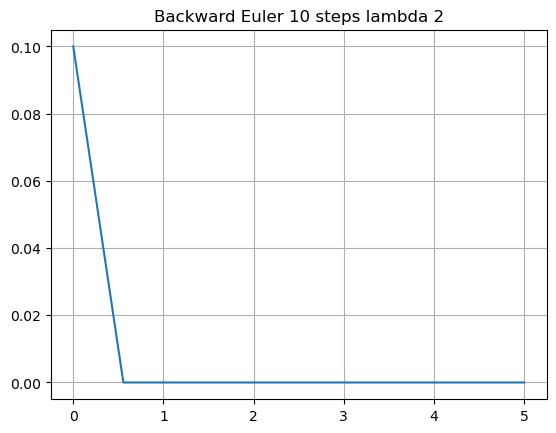

C:\Users\alvis\AppData\Local\Temp\ipykernel_42692\1355420531.py:6: RuntimeWarning: overflow encountered in matmul
  x[i] = x[i-1] + A @ x[i-1] * dt
C:\Users\alvis\AppData\Local\Temp\ipykernel_42692\1355420531.py:6: RuntimeWarning: invalid value encountered in matmul
  x[i] = x[i-1] + A @ x[i-1] * dt
C:\Users\alvis\AppData\Local\Temp\ipykernel_42692\1355420531.py:6: RuntimeWarning: invalid value encountered in add
  x[i] = x[i-1] + A @ x[i-1] * dt


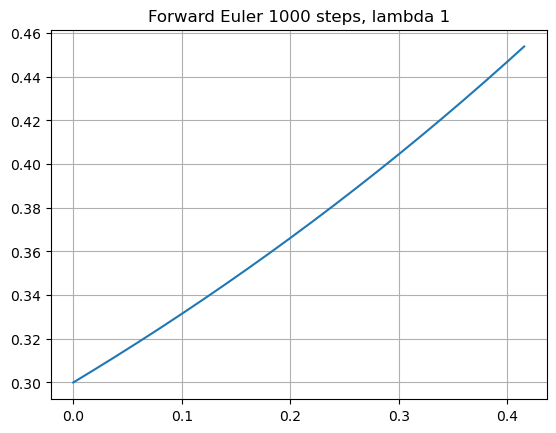

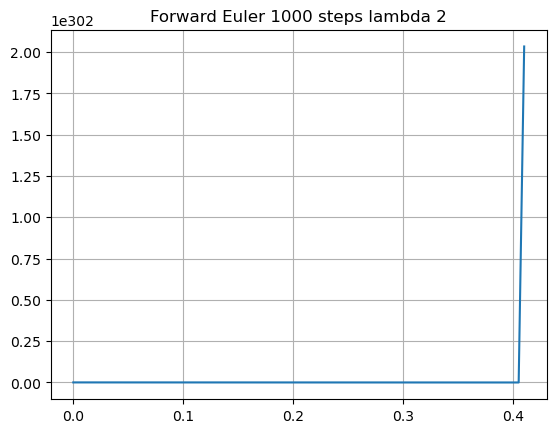

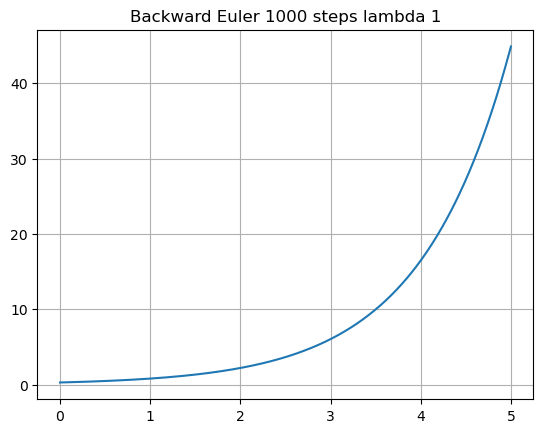

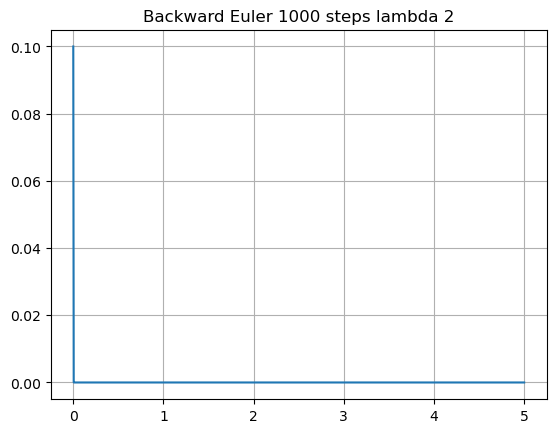

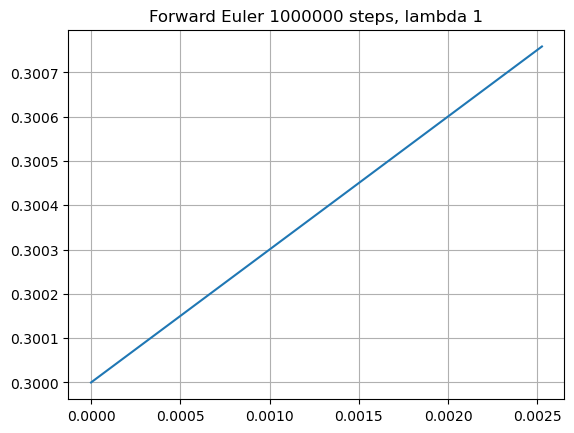

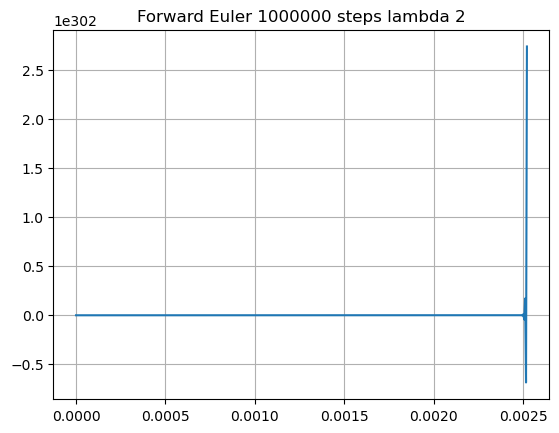

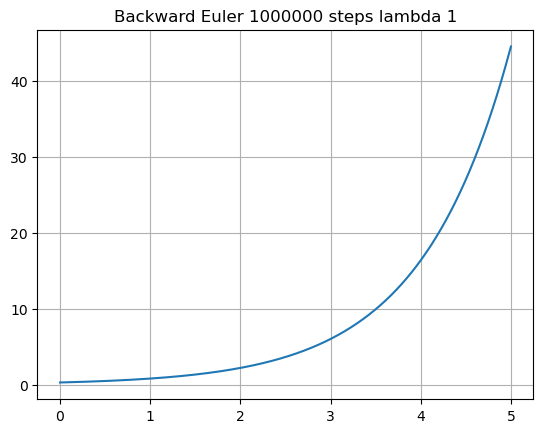

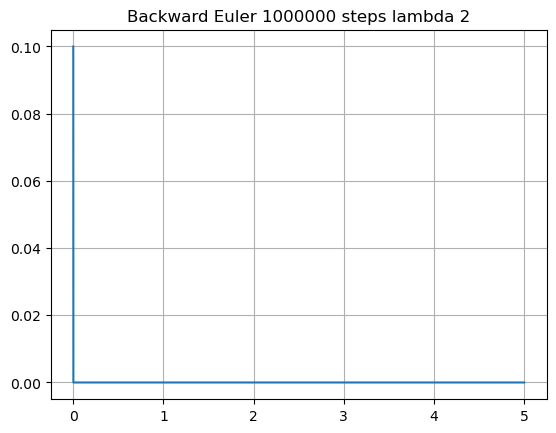

In [7]:
T = 5
for N in Ns:
    x = forward_euler(A, N, T)
    plt.plot(np.linspace(0,T,N), x[:,0])
    plt.title(f'Forward Euler {N} steps, lambda 1')
    plt.grid()
    plt.savefig(path / f'forward_euler_{N}_steps_lambda_1.png')
    plt.show()
    plt.plot(np.linspace(0,T,N), x[:,1])
    plt.title(f'Forward Euler {N} steps lambda 2')
    plt.grid()
    plt.savefig(path / f'forward_euler_{N}_steps_lambda_2.png')
    plt.show()
    x = backward_euler(A, N, T)
    plt.plot(np.linspace(0,T,N), x[:,0])
    plt.title(f'Backward Euler {N} steps lambda 1')
    plt.grid()
    plt.savefig(path / f'backward_euler_{N}_steps_lambda_1.png')
    plt.show()
    plt.plot(np.linspace(0,T,N), x[:,1])
    plt.title(f'Backward Euler {N} steps lambda 2')
    plt.grid()
    plt.savefig(path / f'backward_euler_{N}_steps_lambda_2.png')
    plt.show()

# Part 2

In [8]:
def set_seed(seed = 0):
    np.random.seed(seed)

In [9]:
def forward_euler(a, b, N, T):
    set_seed()
    dt = T/N
    x = np.zeros((N, 1))
    x[0]=1
    for i in range(1,N):
        x[i] = x[i-1] + a* x[i-1]*dt + b* x[i-1] * np.sqrt(dt) * np.random.normal()
    return x

In [23]:
def backward_euler(a, b, N, T):
    set_seed()
    dt = T/N
    x = np.zeros((N, 1))
    x[0]=1
    for i in range(1,N):
        z = np.random.normal()
        x[i] = x[i-1]/(1-a*dt-b*np.sqrt(dt)*z)
    return x

In [35]:
def semi_implicit(a,b,N,T, n):
    set_seed()
    dt = T/N
    x = np.zeros((N, n))
    x[0,:]=1
    for i in range(1,N):
        x[i,:] = x[i-1,:]/(1-a*dt) + b*x[i-1,:]*np.sqrt(dt)*np.random.normal(0,1,n)
    return x

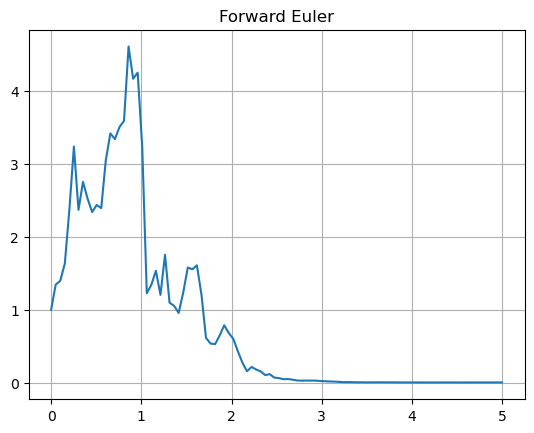

In [12]:
x = forward_euler(-1, 1, 100, 5)
plt.plot(np.linspace(0,5,100), x)
plt.title('Forward Euler')
plt.grid()
plt.savefig(path / 'forward_euler.png')

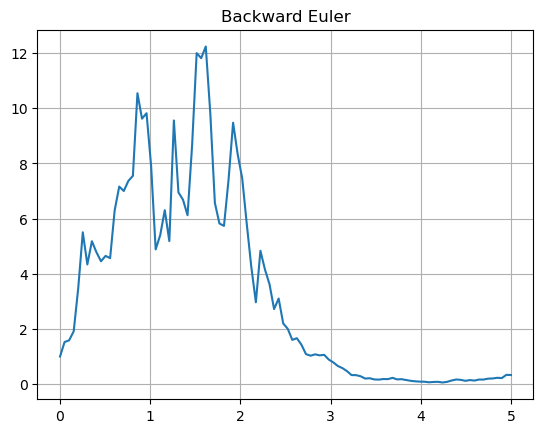

In [24]:
x = backward_euler(-1, 1, 100, 5)
plt.plot(np.linspace(0,5,100), x)
plt.title('Backward Euler')
plt.grid()
plt.savefig(path / 'backward_euler.png')

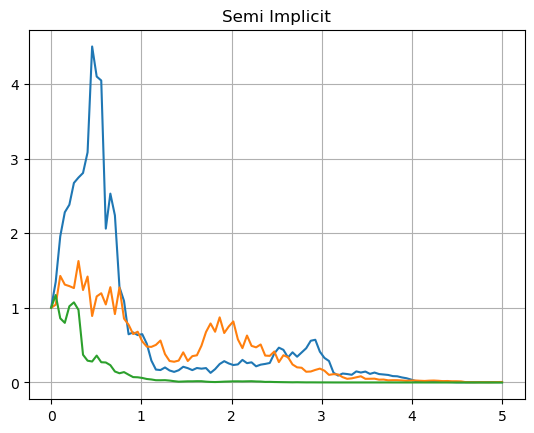

In [37]:
x = semi_implicit(-1, 1, 100, 5, 3)
plt.plot(np.linspace(0,5,100), x)
plt.title('Semi Implicit')
plt.grid()
plt.savefig(path / 'semi_implicit.png')

In [38]:
def gmb_sol(x0, a,b, T, n):
    x = np.linspace(0,T,n)
    mean = np.exp(a*x)*x0
    var = x0**2 * np.exp(2*a*x)*(np.exp(b**2*x)-1)
    return mean, var

Text(0.5, 1.0, 'GMB mean')

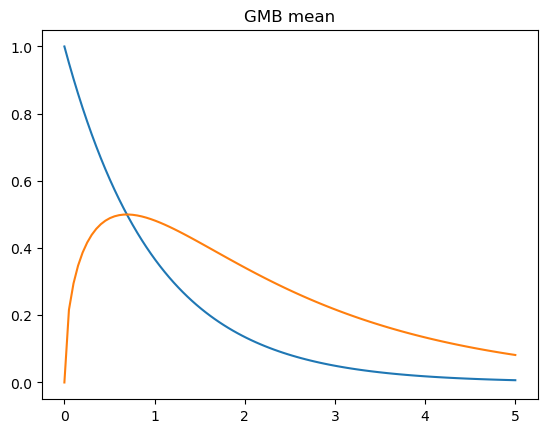

In [43]:
m, v =  gmb_sol(1, -1, 1, 5, 100)
plt.plot(np.linspace(0,5,100), m, label='mean')
plt.plot(np.linspace(0,5,100), np.sqrt(v), label='std')
plt.title('GMB mean')


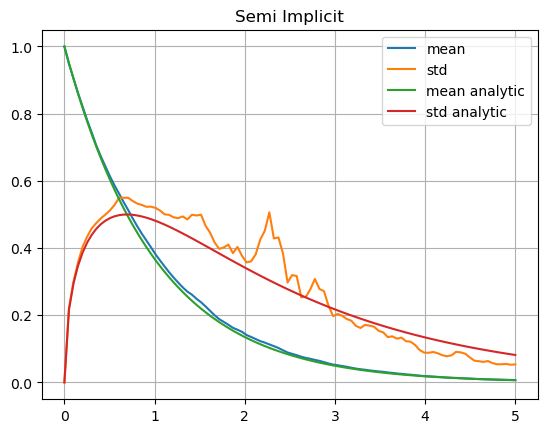

In [48]:
N = int(1e4)
x = semi_implicit(-1, 1, 100, 5, N)
# plt.plot(np.linspace(0,5,100), x[:,:2])
plt.title('Semi Implicit')
plt.plot(np.linspace(0,5,100), np.mean(x, axis=1), label='mean')
plt.plot(np.linspace(0,5,100), np.std(x, axis=1), label='std')
plt.plot(np.linspace(0,5,100), m, label='mean analytic')
plt.plot(np.linspace(0,5,100), np.sqrt(v), label='std analytic')
plt.grid()
plt.legend()
plt.savefig(path / 'semi_implicit.png')

# Exercise 3.c

In [110]:
def forward_euler_x(x_0, b, N, T, n):
    # set_seed()
    dt = T/N
    x = np.zeros((N, n))
    x[0, :]=x_0
    for i in range(1,N):
        z = np.random.normal(0,1,n)
        x[i,:] = x[i-1,:] + np.cos(x[i-1,:])*dt + b * np.sqrt(dt) * z
    return x


def forward_euler_z(x_0, N, T):
    set_seed()
    dt = T/N
    x = np.zeros((N, 1))
    x[0]=x_0
    for i in range(1,N):
        x[i] = x[i-1] + np.cos(x[i-1])*dt
    return x 

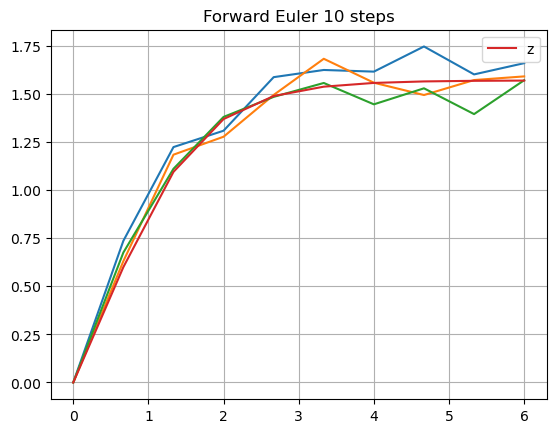

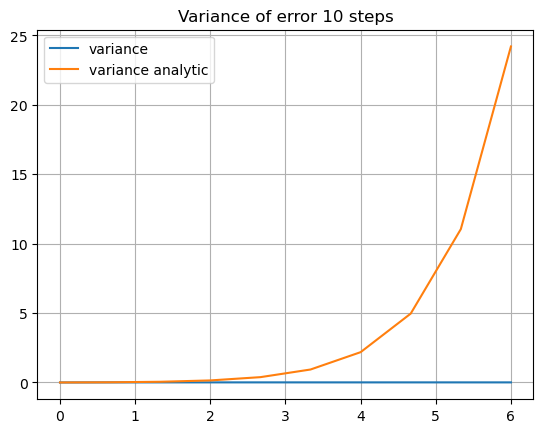

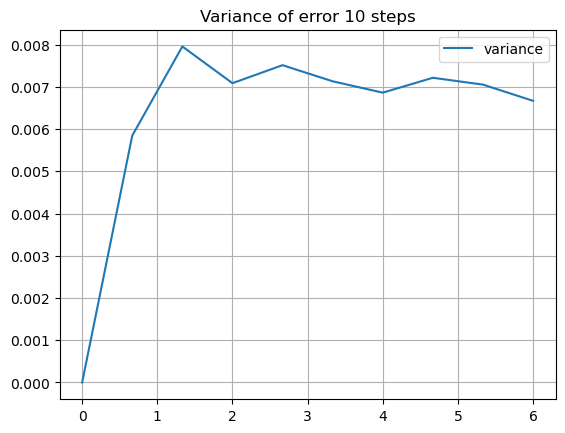

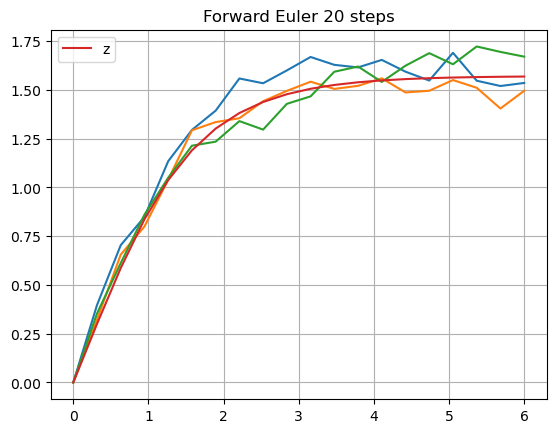

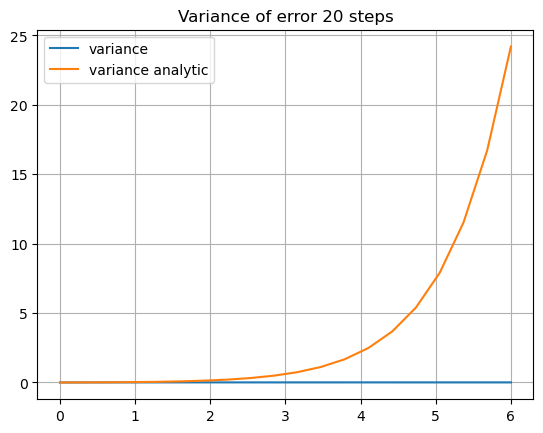

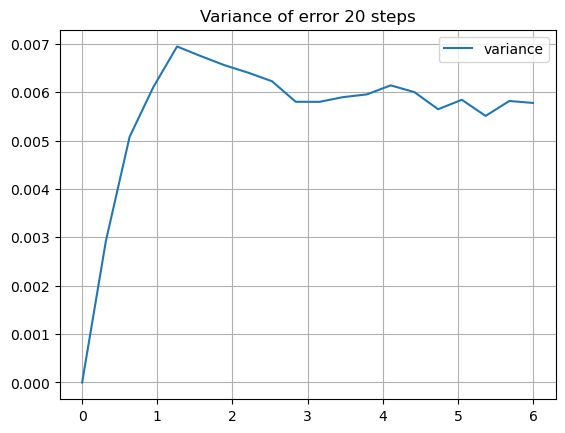

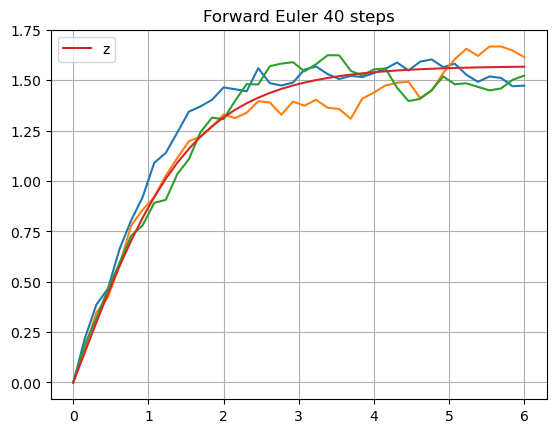

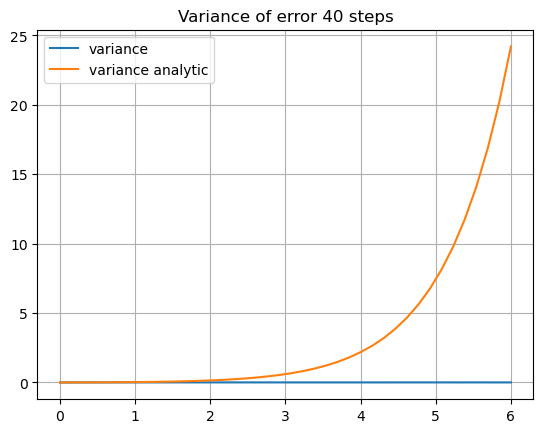

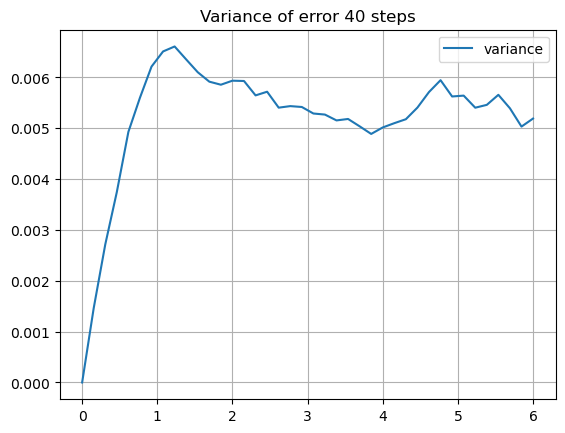

In [124]:
sample_paths = int(1e3)
Ns = [10,20,40]
b=0.1
for N in Ns:
    x = forward_euler_x(0, b, N, 6, sample_paths)
    z = forward_euler_z(0, N, 6)
    et = x-z
    lp = np.linspace(0,6,N)
    plt.plot(lp, x[:,:3])
    plt.plot(np.linspace(0,6,N), z, label='z')
    plt.legend()
    # plt.plot(np.linspace(0,6,N), np.mean(x, axis=1))
    plt.grid()
    plt.title(f'Forward Euler {N} steps')
    plt.savefig(path / f'forward_euler_x_{N}_steps.png')
    plt.show()
    plt.plot(lp, np.var(et, axis=1), label='variance')
    plt.plot(lp, (b**2)*lp*np.exp(lp), label='variance analytic')
    # plt.plot(lp, np.mean(et, axis=1), label='mean')
    plt.grid()
    plt.title(f'Variance of error {N} steps')
    plt.savefig(path / f'variance_error_{N}_steps.png')
    plt.legend()
    plt.show()
    
    plt.plot(lp, np.var(et, axis=1), label='variance')
    plt.title(f'Variance of error {N} steps')
    plt.legend()
    plt.grid()
    plt.savefig(path / f'variance_error_{N}_steps_only.png')
    plt.show()

# Exercise 2

## e

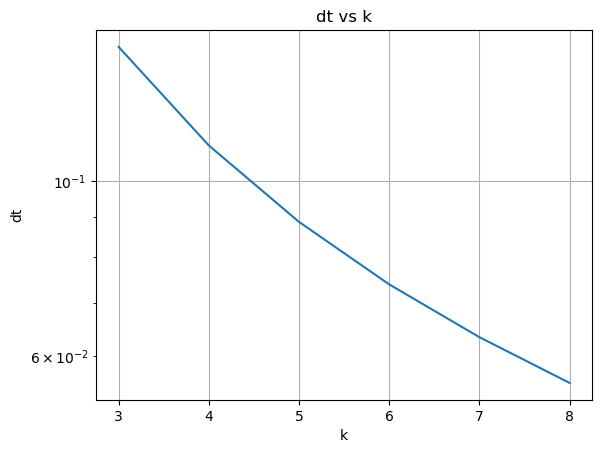

In [140]:
T = 1
r = 0.05
sigma = 0.7



k= np.array([3,4,5,6,7,8], dtype=float)
alpha = np.power(10, -k)

dt = -1/(2*sigma**2 * np.log(alpha))

plt.plot(k, dt)
plt.yscale('log')
plt.grid()
plt.title('dt vs k')
plt.xlabel('k')
plt.ylabel('dt')
plt.savefig(path / 'dt_vs_k.png')
